<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data </header1></center>
<center><h2>Modelo predictivo de zonas de Madrid con mayor incidencia de enfermedades respiratorias </header2><center>
<center><h3>Zona Interior M30</header3><center>

Presentado por: Adela Corina Ponce Roman y Hugo Gómez Bahamonde<br>
Fecha: 15/01/2025

# I.  ANALISIS EXPLORATORIO

# Importación de librerias necesarias

In [6]:
import pandas as pd
from pandas import read_csv
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [7]:
# Asegurar que los resultados sean reproducibles
np.random.seed(1234)
tf.random.set_seed(1234)


## Cargar el Dataset

 La información del conjunto de datos están relacionados con las defunciones mensualess por enfermedades respiratorias y los niveles de concetración de contaminantes (NOX, SOx, PM<2,5, PM<10, Ozono y benceno) por zonas de Madrid. Los niveles de concentración de contaminantes vienen dados en microgramos por metro cúbico. Se trata de un dataset de formato .csv de 37 columnas y 143 registros.  

In [9]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/hgba88/TFM/refs/heads/main/Contaminantes_Muertes_pivotado.csv'
dataset = pd.read_csv(url, sep=';')

## Descripción de la fuente del Dataset

In [11]:
print(dataset.shape)

(143, 37)


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mes                       143 non-null    object 
 1   SO2_InteriorM30           143 non-null    float64
 2   SO2_Norte                 143 non-null    int64  
 3   SO2_Sur                   143 non-null    float64
 4   SO2_Este                  143 non-null    float64
 5   SO2_Oeste                 143 non-null    int64  
 6   NO_InteriorM30            143 non-null    float64
 7   NO_Norte                  143 non-null    float64
 8   NO_Sur                    143 non-null    float64
 9   NO_Este                   143 non-null    float64
 10  NO_Oeste                  143 non-null    float64
 11  O3_InteriorM30            143 non-null    float64
 12  O3_Norte                  143 non-null    float64
 13  O3_Sur                    143 non-null    float64
 14  O3_Este   

In [13]:
# Se cambia el tipo de datos de las columnas tipo object (Mes) --> datetime; las columnas tipo float64 -> int64 

dataset['Mes'] = pd.to_datetime(dataset['Mes'])
dataset['SO2_InteriorM30'] = dataset['SO2_InteriorM30'].astype('int64')
dataset['SO2_Sur'] = dataset['SO2_Sur'].astype('int64')
dataset['SO2_Este'] = dataset['SO2_Este'].astype('int64')
dataset['NO_InteriorM30'] = dataset['NO_InteriorM30'].astype('int64')
dataset['NO_Norte'] = dataset['NO_Norte'].astype('int64')
dataset['NO_Sur'] = dataset['NO_Sur'].astype('int64')
dataset['NO_Este'] = dataset['NO_Este'].astype('int64')
dataset['NO_Oeste'] = dataset['NO_Oeste'].astype('int64')
dataset['O3_InteriorM30'] = dataset['O3_InteriorM30'].astype('int64')
dataset['O3_Norte'] = dataset['O3_Norte'].astype('int64')
dataset['O3_Sur'] = dataset['O3_Sur'].astype('int64')
dataset['O3_Oeste'] = dataset['O3_Oeste'].astype('int64')
dataset['Particulas25_InteriorM30'] = dataset['Particulas25_InteriorM30'].astype('int64')
dataset['Particulas10_InteriorM30'] = dataset['Particulas10_InteriorM30'].astype('int64')
dataset['Particulas10_Norte'] = dataset['Particulas10_Norte'].astype('int64')
dataset['Benceno_InteriorM30'] = dataset['Benceno_InteriorM30'].astype('int64')
dataset['Benceno_Norte'] = dataset['Benceno_Norte'].astype('int64')
dataset['Benceno_Sur'] = dataset['Benceno_Sur'].astype('int64')
dataset['Benceno_Oeste'] = dataset['Benceno_Oeste'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       143 non-null    datetime64[ns]
 1   SO2_InteriorM30           143 non-null    int64         
 2   SO2_Norte                 143 non-null    int64         
 3   SO2_Sur                   143 non-null    int64         
 4   SO2_Este                  143 non-null    int64         
 5   SO2_Oeste                 143 non-null    int64         
 6   NO_InteriorM30            143 non-null    int64         
 7   NO_Norte                  143 non-null    int64         
 8   NO_Sur                    143 non-null    int64         
 9   NO_Este                   143 non-null    int64         
 10  NO_Oeste                  143 non-null    int64         
 11  O3_InteriorM30            143 non-null    int64         
 12  O3_Norte              

In [14]:
dataset.head()

,Mes,SO2_InteriorM30,SO2_Norte,SO2_Sur,SO2_Este,SO2_Oeste,NO_InteriorM30,NO_Norte,NO_Sur,NO_Este,...,Benceno_Norte,Benceno_Sur,Benceno_Este,Benceno_Oeste,Muertes_InteriorM30,Muertes_Norte,Muertes_Sur,Muertes_Este,Muertes_Oeste,Muertes_Total
0,2010-01-01,14,0,9,13,8,39,47,54,52,...,0,2,0,0,354,14,69,28,22,486
1,2010-02-01,15,0,0,13,0,43,42,52,49,...,0,1,0,0,312,13,61,24,20,429
2,2010-03-01,0,0,0,0,0,40,37,50,44,...,0,1,0,0,305,12,59,24,19,420
3,2010-04-01,10,0,0,12,0,37,33,44,36,...,0,0,0,0,314,13,61,24,20,432
4,2010-05-01,9,10,8,0,11,30,0,34,24,...,0,0,0,0,311,13,60,24,20,428


In [15]:
# Se elimina del dataset los registros del año 2020 debido al covid, al producirse miles de muertes causadas por el virus
# y los niveles de las concentraciones de los contaminantes no son representativos porque recluyeron en casa a la población.

fecha_inicio = pd.Timestamp('2020-01-01')
fecha_fin = pd.Timestamp('2020-12-01')
dataset_wo2020 = dataset[~((dataset['Mes'] >= fecha_inicio) & (dataset['Mes'] <= fecha_fin))]

# Se otienen varios datasets por diferentes zonas seleccionando las columnas según las zonas

dataset_M30 = dataset_wo2020[['SO2_InteriorM30','NO_InteriorM30','O3_InteriorM30','Particulas25_InteriorM30','Particulas10_InteriorM30', 'Benceno_InteriorM30','Muertes_InteriorM30']]

In [16]:
print(dataset_M30)

     SO2_InteriorM30  NO_InteriorM30  O3_InteriorM30  \
0                 14              39               0   
1                 15              43               0   
2                  0              40               0   
3                 10              37               0   
4                  9              30              63   
..               ...             ...             ...   
138                0              21              73   
139                0              28               0   
140                0              39              42   
141                1               0               0   
142                0              35               0   

     Particulas25_InteriorM30  Particulas10_InteriorM30  Benceno_InteriorM30  \
0                           6                        11                    0   
1                           0                        13                    0   
2                           0                        23                    0   
3      

In [17]:
dataset_M30.isna().sum()

SO2_InteriorM30             0
NO_InteriorM30              0
O3_InteriorM30              0
Particulas25_InteriorM30    0
Particulas10_InteriorM30    0
Benceno_InteriorM30         0
Muertes_InteriorM30         0
dtype: int64

In [18]:
 print(dataset_M30.groupby('SO2_InteriorM30').size())

SO2_InteriorM30
0     103
1       1
2       1
3       2
4       2
5       3
6       2
7       3
8       2
9       3
10      3
12      1
13      2
14      2
15      1
dtype: int64


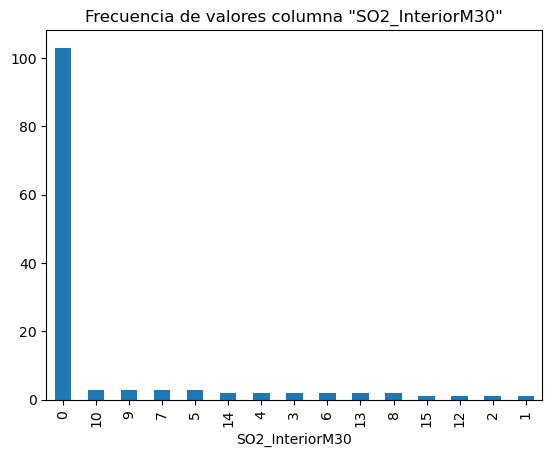

In [19]:
class_counts = dataset_M30['SO2_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "SO2_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [20]:
 print(dataset_M30.groupby('NO_InteriorM30').size())

NO_InteriorM30
0     28
20     1
21     1
22     1
23     1
24     1
25     1
27     1
28     3
29     3
30     4
31     5
32     3
33     3
34     4
35     2
36     2
37     3
38     2
39     6
40     4
41     2
42     3
43     5
44     4
45     4
46     2
47     2
48     2
49     1
50     1
51     2
52     2
54     3
55     1
56     3
57     1
58     4
59     1
60     1
61     2
62     1
63     1
65     1
67     1
68     1
71     1
dtype: int64


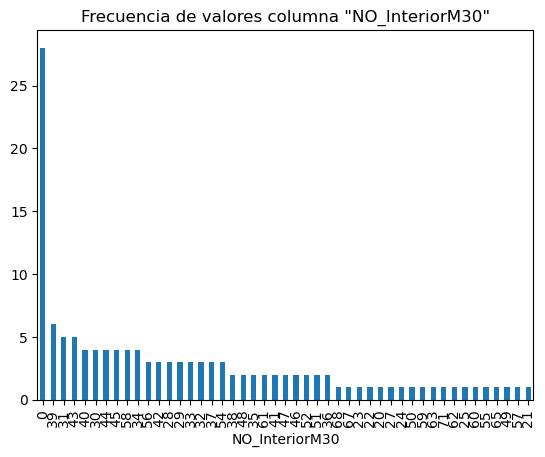

In [21]:
class_counts = dataset_M30['NO_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "NO_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [22]:
 print(dataset_M30.groupby('O3_InteriorM30').size())

O3_InteriorM30
0     85
12     1
14     1
16     1
17     1
19     1
21     2
22     1
25     1
27     1
28     3
29     1
31     1
32     1
35     1
40     1
41     1
42     2
45     1
46     1
49     1
50     1
52     1
53     2
54     1
55     1
56     2
57     1
58     1
59     1
63     1
64     1
68     1
70     1
71     2
73     2
76     1
78     1
79     1
dtype: int64


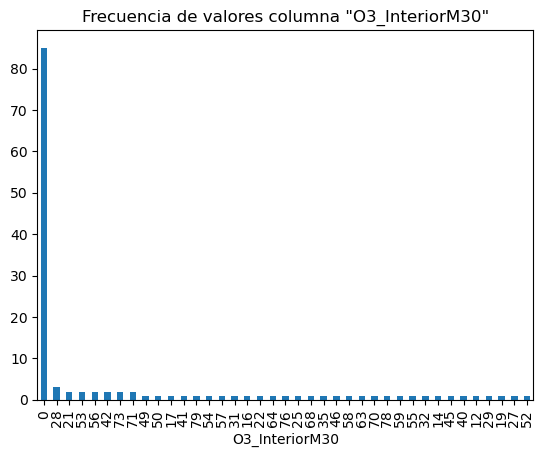

In [23]:
class_counts = dataset_M30['O3_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "O3_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [24]:
print(dataset_M30.groupby('Particulas25_InteriorM30').size())

Particulas25_InteriorM30
0     111
4       1
5       1
6       3
7       3
8       4
9       3
10      2
11      1
12      1
15      1
dtype: int64


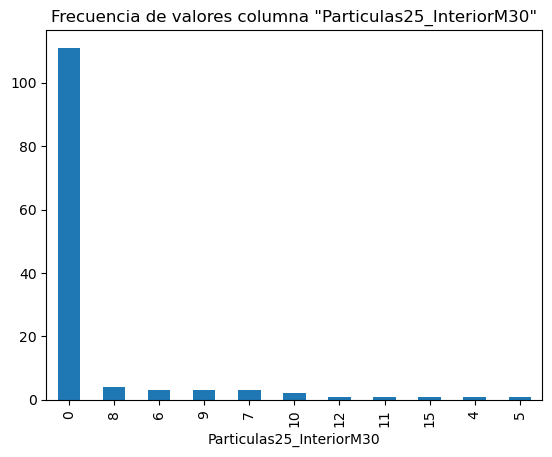

In [25]:
class_counts = dataset_M30['Particulas25_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas25_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [26]:
print(dataset_M30.groupby('Particulas10_InteriorM30').size())

Particulas10_InteriorM30
0     74
6      1
10     2
11     3
12     2
13     3
14     4
15     3
16     3
17     3
18     3
19     2
20     2
21     2
22     2
23     3
24     3
25     3
26     3
27     1
28     1
29     1
30     1
31     1
32     1
33     1
37     1
40     1
43     1
dtype: int64


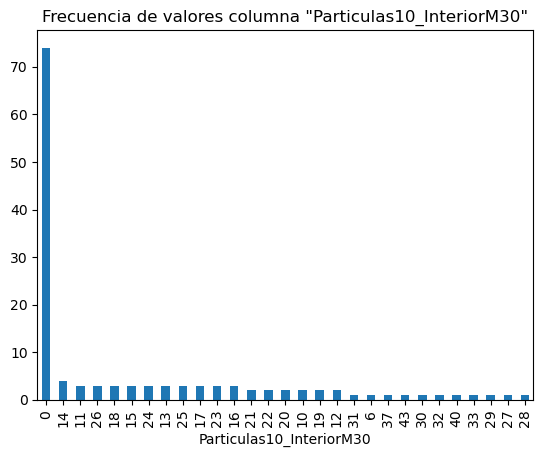

In [27]:
class_counts = dataset_M30['Particulas10_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas10_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [28]:
print(dataset_M30.groupby('Benceno_InteriorM30').size())

Benceno_InteriorM30
0    109
1     22
dtype: int64


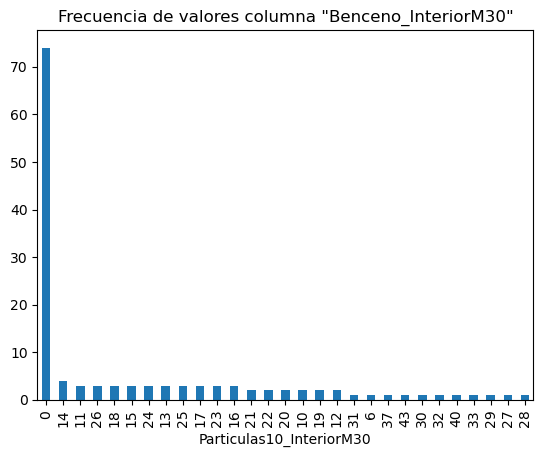

In [29]:
#class_counts = dataset_M30['Benceno_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Benceno_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [30]:
print(dataset_M30.groupby('Muertes_InteriorM30').size())

Muertes_InteriorM30
225    1
242    1
247    1
248    1
252    1
      ..
446    1
452    1
469    1
494    1
510    1
Length: 83, dtype: int64


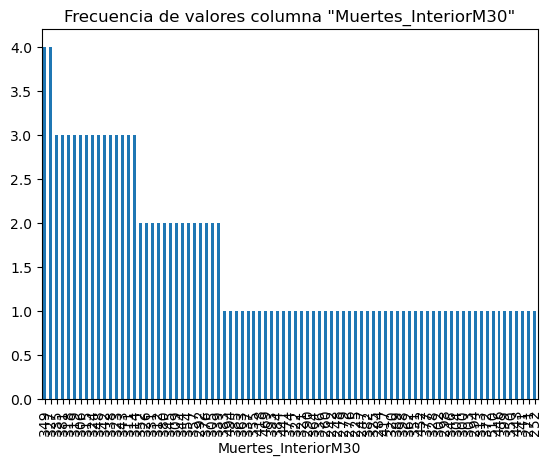

In [31]:
class_counts = dataset_M30['Muertes_InteriorM30'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Muertes_InteriorM30"')
# Mostrar el gráfico
plt.show() 

In [32]:
# En los niveles de cocentracion del Benceno son hay dos valores 0 y 1. En esta columna no reemplzamos los valores 0 por la media

media_SO2_InteriorM30 = dataset_M30['SO2_InteriorM30'][dataset_M30['SO2_InteriorM30'] != 0].mean()
dataset_M30['SO2_InteriorM30'] = dataset_M30['SO2_InteriorM30'].replace(0, media_SO2_InteriorM30)
media_NO_InteriorM30 = dataset_M30['NO_InteriorM30'][dataset_M30['NO_InteriorM30'] != 0].mean()
dataset_M30['NO_InteriorM30'] = dataset_M30['NO_InteriorM30'].replace(0, media_NO_InteriorM30)
media_O3_InteriorM30 = dataset_M30['O3_InteriorM30'][dataset_M30['O3_InteriorM30'] != 0].mean()
dataset_M30['O3_InteriorM30'] = dataset_M30['O3_InteriorM30'].replace(0, media_O3_InteriorM30)
media_Particulas10_InteriorM30 = dataset_M30['Particulas10_InteriorM30'][dataset_M30['Particulas10_InteriorM30'] != 0].mean()
dataset_M30['Particulas10_InteriorM30'] = dataset_M30['Particulas10_InteriorM30'].replace(0, media_Particulas10_InteriorM30)
media_Particulas25_InteriorM30 = dataset_M30['Particulas25_InteriorM30'][dataset_M30['Particulas25_InteriorM30'] != 0].mean()
dataset_M30['Particulas25_InteriorM30'] = dataset_M30['Particulas25_InteriorM30'].replace(0, media_Particulas25_InteriorM30)

In [33]:
print(dataset_M30)

     SO2_InteriorM30  NO_InteriorM30  O3_InteriorM30  \
0          14.000000       39.000000       45.630435   
1          15.000000       43.000000       45.630435   
2           7.821429       40.000000       45.630435   
3          10.000000       37.000000       45.630435   
4           9.000000       30.000000       63.000000   
..               ...             ...             ...   
138         7.821429       21.000000       73.000000   
139         7.821429       28.000000       45.630435   
140         7.821429       39.000000       42.000000   
141         1.000000       42.126214       45.630435   
142         7.821429       35.000000       45.630435   

     Particulas25_InteriorM30  Particulas10_InteriorM30  Benceno_InteriorM30  \
0                        6.00                 11.000000                    0   
1                        8.25                 13.000000                    0   
2                        8.25                 23.000000                    0   
3      

# II. RED NEURONAL CON TRES CAPAS

In [35]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_M30.sample(frac=0.8,random_state=1)
test_dataset = dataset_M30.drop(train_dataset.index) 

In [36]:
train_dataset

,SO2_InteriorM30,NO_InteriorM30,O3_InteriorM30,Particulas25_InteriorM30,Particulas10_InteriorM30,Benceno_InteriorM30,Muertes_InteriorM30
42,7.821429,42.126214,78.000000,8.25,31.000000,0,328
80,8.000000,42.126214,45.630435,8.25,25.000000,0,306
140,7.821429,39.000000,42.000000,8.25,20.421053,0,247
5,7.000000,40.000000,54.000000,8.25,20.421053,0,284
44,7.821429,42.000000,45.630435,8.25,20.421053,0,298
...,...,...,...,...,...,...,...
9,7.821429,65.000000,27.000000,8.25,20.421053,1,305
13,7.821429,68.000000,45.630435,8.25,26.000000,1,327
86,7.821429,44.000000,45.630435,8.25,20.421053,0,363
96,7.821429,51.000000,21.000000,8.25,20.421053,0,469


In [37]:
test_dataset

,SO2_InteriorM30,NO_InteriorM30,O3_InteriorM30,Particulas25_InteriorM30,Particulas10_InteriorM30,Benceno_InteriorM30,Muertes_InteriorM30
1,15.000000,43.000000,45.630435,8.25,13.000000,0,312
6,7.000000,47.000000,45.630435,8.25,20.421053,0,323
11,12.000000,62.000000,45.630435,8.25,20.421053,1,342
14,7.821429,48.000000,45.630435,8.25,21.000000,1,349
16,7.821429,43.000000,56.000000,8.25,20.421053,0,313
18,5.000000,36.000000,45.630435,8.25,23.000000,0,306
20,7.821429,55.000000,45.630435,8.25,20.421053,1,292
25,7.821429,52.000000,45.630435,10.00,17.000000,1,398
28,7.821429,37.000000,45.630435,8.25,20.421053,0,349
29,7.821429,32.000000,53.000000,8.25,40.000000,0,327


In [38]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_InteriorM30',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_InteriorM30")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_InteriorM30,105.0,7.632993,1.586091,1.0,7.821429,7.821429,7.821429,14.0
NO_InteriorM30,105.0,41.533611,10.561879,20.0,34.000000,42.126214,45.000000,71.0
O3_InteriorM30,105.0,45.714079,12.590554,12.0,45.630435,45.630435,45.630435,79.0
Particulas25_InteriorM30,105.0,8.230952,1.065011,4.0,8.250000,8.250000,8.250000,15.0
Particulas10_InteriorM30,105.0,20.232581,4.973587,6.0,20.421053,20.421053,20.421053,43.0
Benceno_InteriorM30,105.0,0.142857,0.351605,0.0,0.000000,0.000000,0.000000,1.0


In [39]:
#Separar el valor objetivo, "Muertes_InteriorM30" de las caracteristicas. 
#Esta etiqueta, "Muertes_InteriorM30" es el valor que entrenara el modelo para predecir
train_labels = train_dataset.pop("Muertes_InteriorM30")
test_labels = test_dataset.pop("Muertes_InteriorM30")


In [40]:
train_labels

42     328
80     306
140    247
5      284
44     298
      ... 
9      305
13     327
86     363
96     469
94     342
Name: Muertes_InteriorM30, Length: 105, dtype: int64

In [41]:
test_labels

1      312
6      323
11     342
14     349
16     313
18     306
20     292
25     398
28     349
29     327
37     327
50     357
64     357
68     311
71     380
72     381
76     324
79     323
84     494
87     339
101    344
105    335
106    349
107    384
109    383
119    364
Name: Muertes_InteriorM30, dtype: int64

In [42]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [43]:
print(len(train_dataset.keys()))

6


In [44]:
# Construccion del modelo: se usa un modelo 'secuencial' con dos capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [45]:
model = build_model()

In [46]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[ 0.20103183],
       [-0.08331285],
       [-0.07904453],
       [-0.00059053],
       [-0.04299638],
       [-0.08446182],
       [ 0.1458033 ],
       [-0.03146006],
       [-0.19967571],
       [-0.09092657]], dtype=float32)

In [48]:
# Entrenamiento del modelo durante 500 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 300
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................

In [49]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,1001.389709,23.604519,1001.389709,5850.875000,59.519112,5850.875000,295
296,999.376831,23.574694,999.376831,5837.595215,59.465919,5837.595215,296
297,997.381958,23.546976,997.381958,5825.623535,59.401402,5825.623535,297
298,995.324951,23.519123,995.324951,5812.760742,59.342449,5812.760742,298
299,993.337891,23.492252,993.337891,5801.502441,59.287727,5801.502441,299


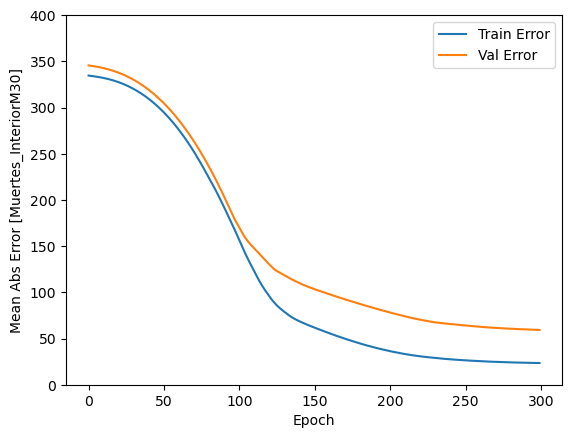

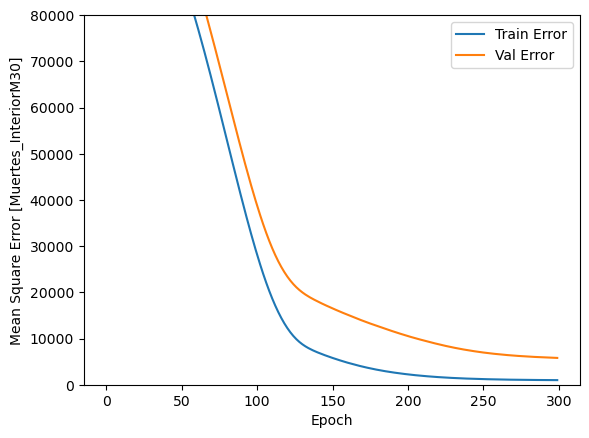

In [50]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_InteriorM30]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,400])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_InteriorM30]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,80000])
    plt.legend()
    plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 250 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando la puntuación de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................

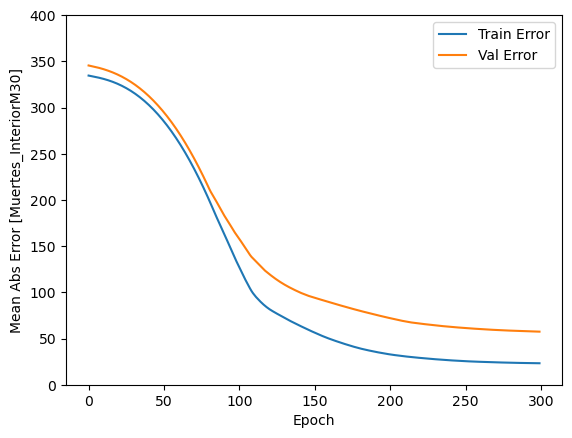

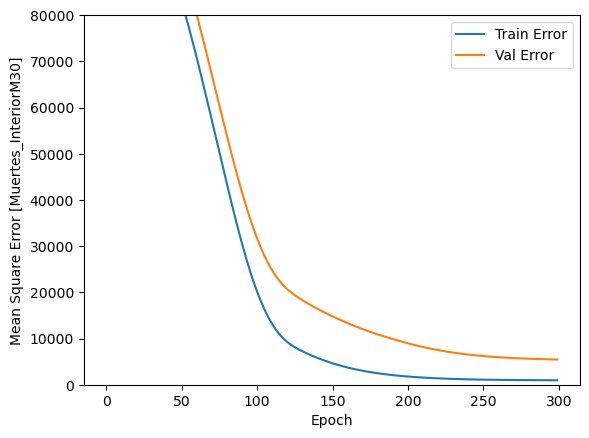

In [52]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

El gráfico muestra que en el conjunto de validación, el error promedio generalmente es muy pequeño practicamente coincide las lineas del conjunto de datos de entrenamiento y validación.

Comprobación como de bien generaliza el modelo al usar el conjunto ** test **, que no se uso para entrenar el modelo. Esto nos dice como de bien podemos esperar que el modelo prediga cuándo sea usado en el mundo real.

In [55]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 42ms/step - loss: 2961.0759 - mae: 39.1242 - mse: 2961.0759
Testing set Mean Abs Error: 39.12 


 Predicción de los valores de Muertes_InteriorM30 utilizando datos del conjunto de pruebas:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


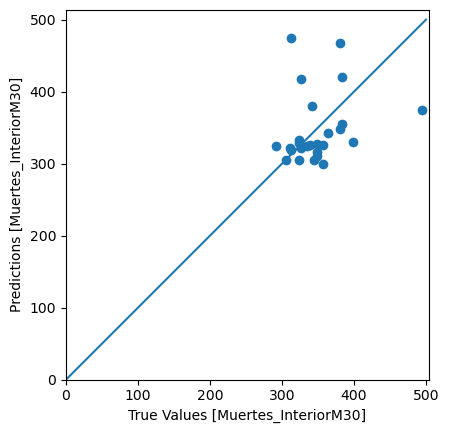

In [57]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels , test_predictions)
plt.xlabel('True Values [Muertes_InteriorM30]')
plt.ylabel('Predictions [Muertes_InteriorM30]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-500, 500], [-500, 500])

In [58]:
test_labels     

1      312
6      323
11     342
14     349
16     313
18     306
20     292
25     398
28     349
29     327
37     327
50     357
64     357
68     311
71     380
72     381
76     324
79     323
84     494
87     339
101    344
105    335
106    349
107    384
109    383
119    364
Name: Muertes_InteriorM30, dtype: int64

Parece que el modelo predice bien en el rango de valores de 'Muertes_InteriorM30' entre 320 y 380. Echemos un vistazo a la distribución de errores.

In [60]:
test_predictions

array([473.83905, 328.2371 , 379.58698, 310.8523 , 318.36   , 304.67447,
       324.84665, 329.46133, 315.81754, 417.64624, 322.38174, 299.92865,
       325.5582 , 321.5422 , 467.51614, 348.63754, 332.32745, 305.07193,
       374.3879 , 325.5582 , 305.07193, 324.2159 , 327.1913 , 355.26822,
       420.30215, 341.8975 ], dtype=float32)

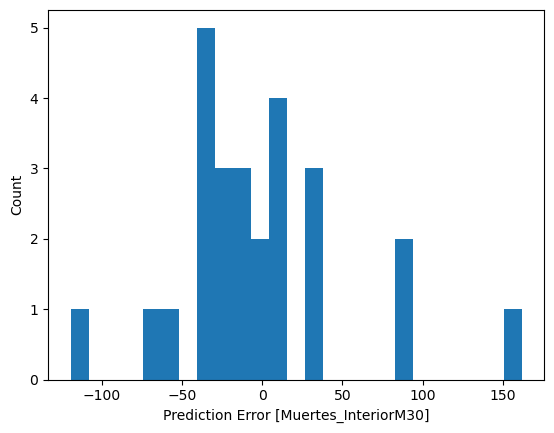

In [61]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_InteriorM30]")
_ = plt.ylabel("Count")

La distribucion del error es casi una funcion gaussiana

In [63]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 1107.133
MSE DL : 2961.076
MAE RF : 27.618
MAE DL : 39.124


# III. Comparación del desempeño de modelos

Comparación del desempeño de modelos.Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


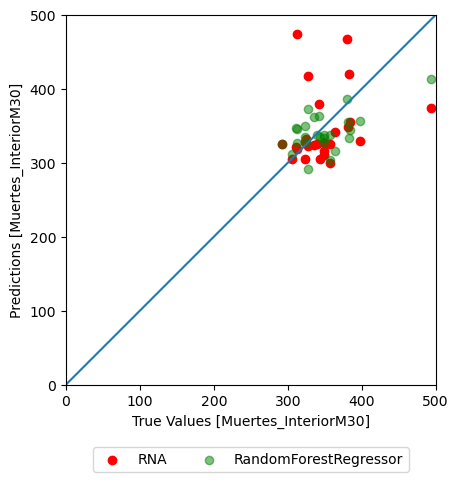

In [66]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' ,alpha=0.5,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_InteriorM30]')
plt.ylabel('Predictions [Muertes_InteriorM30]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,500])
plt.ylim([0,500])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-600, 600], [-600, 600])

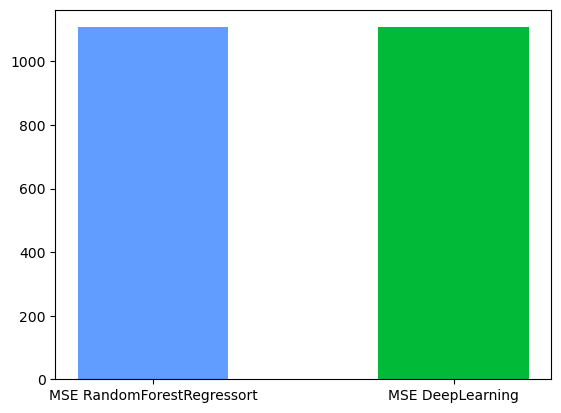

In [67]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

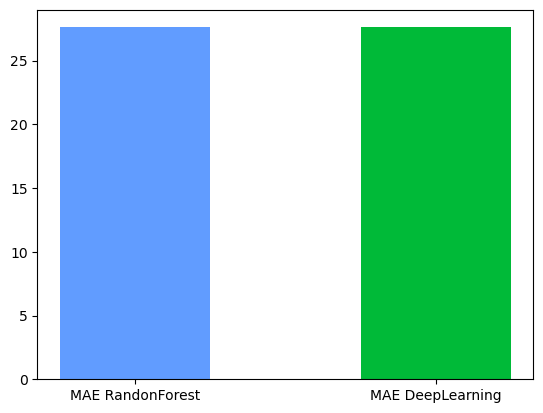

In [68]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()

# IV. RED NEURONAL CON CUATRO CAPAS

In [70]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_M30.sample(frac=0.8,random_state=0)
test_dataset = dataset_M30.drop(train_dataset.index)
train_dataset

,SO2_InteriorM30,NO_InteriorM30,O3_InteriorM30,Particulas25_InteriorM30,Particulas10_InteriorM30,Benceno_InteriorM30,Muertes_InteriorM30
8,7.821429,54.000000,45.630435,12.00,29.000000,1,271
61,7.000000,40.000000,42.000000,8.00,20.421053,1,446
90,7.821429,42.126214,45.630435,8.25,20.421053,0,338
106,7.821429,43.000000,45.630435,8.25,20.421053,0,349
71,13.000000,67.000000,45.630435,8.25,37.000000,1,380
...,...,...,...,...,...,...,...
80,8.000000,42.126214,45.630435,8.25,25.000000,0,306
20,7.821429,55.000000,45.630435,8.25,20.421053,1,292
136,7.821429,22.000000,45.630435,8.25,20.421053,0,279
72,10.000000,45.000000,45.630435,8.25,20.421053,0,381


In [71]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_InteriorM30',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_InteriorM30")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_InteriorM30,105.0,7.925510,1.784183,2.0,7.821429,7.821429,7.821429,15.0
NO_InteriorM30,105.0,41.549052,10.045561,21.0,35.000000,42.126214,45.000000,71.0
O3_InteriorM30,105.0,46.216770,10.904200,12.0,45.630435,45.630435,45.630435,78.0
Particulas25_InteriorM30,105.0,8.242857,1.048956,4.0,8.250000,8.250000,8.250000,15.0
Particulas10_InteriorM30,105.0,20.619048,5.528655,6.0,20.421053,20.421053,20.421053,43.0
Benceno_InteriorM30,105.0,0.123810,0.330944,0.0,0.000000,0.000000,0.000000,1.0


In [72]:
# Separar el valor objetivo, "Muertes_InteriorM30" de las caracteristicas.
# Esta etiqueta, "Muertes_InteriorM30" es el valor que entrenara el modelo para predecir.
train_labels = train_dataset.pop('Muertes_InteriorM30')
test_labels = test_dataset.pop('Muertes_InteriorM30')
train_labels

8      271
61     446
90     338
106    349
71     380
      ... 
80     306
20     292
136    279
72     381
77     324
Name: Muertes_InteriorM30, Length: 105, dtype: int64

In [73]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [74]:
# Construccion del modelo: se usa un modelo 'secuencial' con TRES capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [75]:
model = build_model()

In [76]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,833 (34.50 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[ 0.07709035],
       [-0.03511056],
       [-0.02394787],
       [-0.02193367],
       [ 0.29477236],
       [ 0.00292666],
       [-0.02440238],
       [ 0.13928348],
       [ 0.08300149],
       [-0.01927773]], dtype=float32)

In [78]:
# Entrenamiento del modelo durante 400 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 200
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................
..................................................

In [79]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,1336.090332,26.845469,1336.090332,979.491089,25.201712,979.491089,195
196,1332.789429,26.806911,1332.789429,980.603638,25.208113,980.603638,196
197,1329.425171,26.765102,1329.425171,983.278076,25.223026,983.278076,197
198,1326.463013,26.727961,1326.463013,988.871460,25.267380,988.871460,198
199,1323.217285,26.690542,1323.217285,989.647888,25.279436,989.647888,199


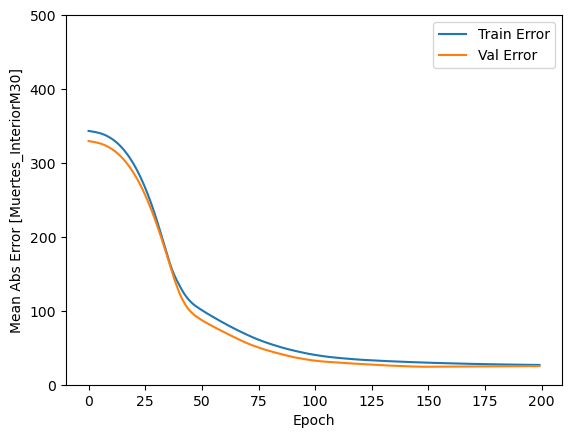

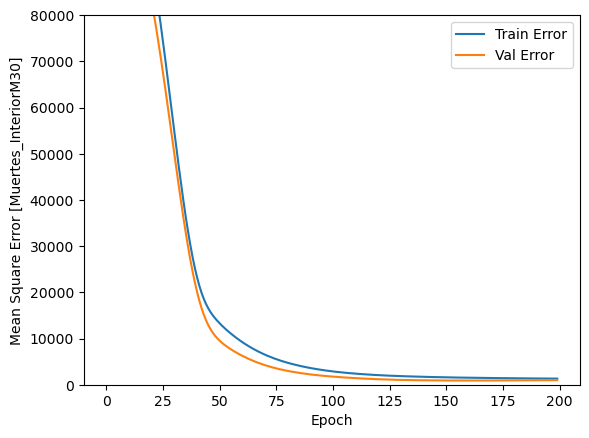

In [80]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_InteriorM30]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,500])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_InteriorM30]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,80000])
    plt.legend()
    plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 130 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando la puntuación de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.


..................................................
..................................................
..................................................
..................................................

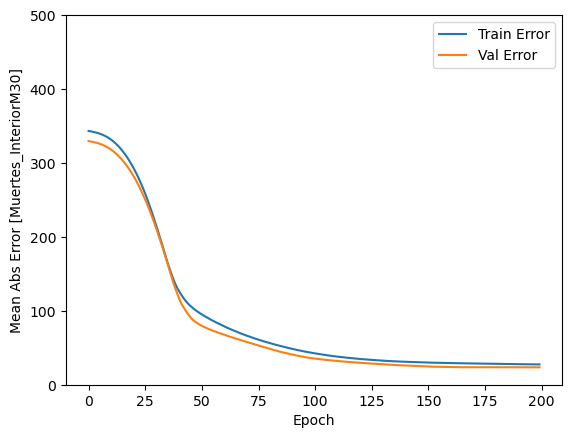

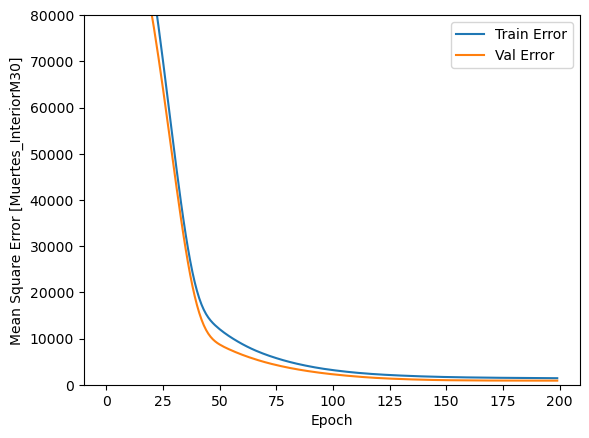

In [82]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

El gráfico muestra que en el conjunto de validación, el error promedio generalmente es muy pequeño practicamente coincide las lineas del conjunto de datos de entrenamiento y validación.

Comprobación como de bien generaliza el modelo al usar el conjunto ** test **, que no se uso para entrenar el modelo. Esto nos dice como de bien podemos esperar que el modelo prediga cuándo sea usado en el mundo real.

In [85]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 40ms/step - loss: 2979.5308 - mae: 40.5265 - mse: 2979.5308
Testing set Mean Abs Error: 40.53 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


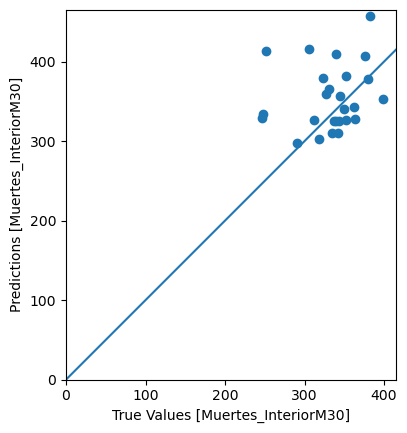

In [86]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels , test_predictions)
plt.xlabel('True Values [Muertes_InteriorM30]')
plt.ylabel('Predictions [Muertes_InteriorM30]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-600, 600], [-600, 600])

Parece que el modelo predice bien en el rango de valores de 'Muertes_InteriorM30' entre 320 y 380. Echemos un vistazo a la distribución de errores.

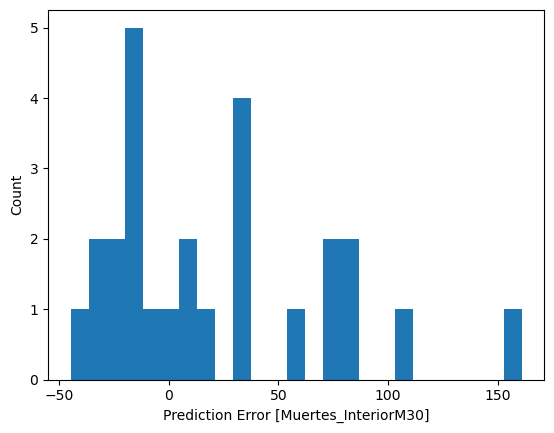

In [88]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_InteriorM30]")
_ = plt.ylabel("Count")

La distribucion del error es casi una funcion gaussiana

In [90]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 2835.255
MSE DL : 2979.531
MAE RF : 38.353
MAE DL : 40.527


# V. Comparación del desempeño de modelos

Comparación del desempeño de modelos. Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


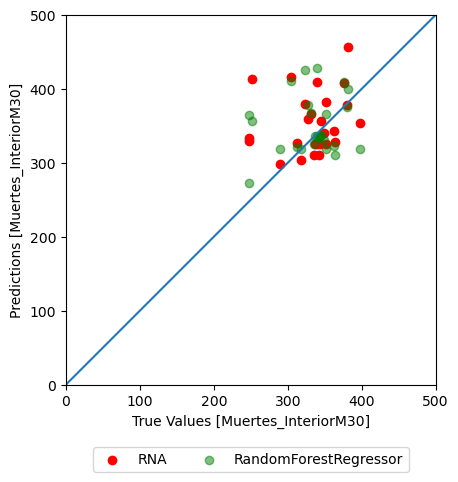

In [93]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' , alpha=0.5,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_InteriorM30]')
plt.ylabel('Predictions [Muertes_InteriorM30]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,500])
plt.ylim([0,500])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-600, 600], [-600, 600])

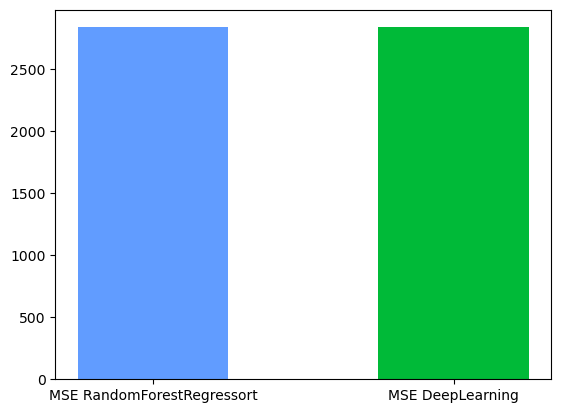

In [171]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

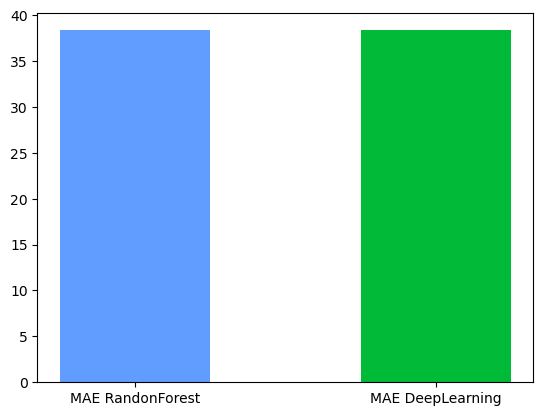

In [95]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()